# Certificate in Data Analytics for Business (March-May 2022)
### By: Marta Golec

## Project: Trends In Adoption of Children - Ireland and USA
Abstract:
This Project sets out to analyse the trends in adoption of children in Ireland and USA and to see if the high adoption rates in Ireland were influenced by the fact that a famous person (a.k.a. celebrity) adopted a child and received a large publicity and media coverage as a result.

I chose this particular topic, because I would like to see what the current trend is in terms of child adoption, amidst growing popularity of gestational surrogacy (a process where one person, who did not provide the egg used in conception, carries a fetus through pregnancy and gives birth to a baby for another person or couple) (1)

## Dataset I - CSV

In [1]:
# Importing packages that will be used throughout the project

import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing csv file and converting it into a new DataFrame

adoption_trends_irl = pd.read_csv('Birth_and_Domestic_Adoption_Trends_1953-2020-converted.csv')

In [3]:
# Inspecting the DataFrame

adoption_trends_irl

,Year,Total Births*,Non-Marital Births*,% of Total Births,No. of Adoptions,Unnamed: 5
0,1953.0,"62,558","1,340",2.14,381,NaN
1,1954.0,"62,534","1,310",2.09,888,NaN
2,1955.0,"61,662","1,234",2.00,786,NaN
3,1956.0,"60,740","1,173",1.93,565,NaN
4,1957.0,"61,242","1,032",1.69,752,NaN
...,...,...,...,...,...,...
66,2019.0,"59,796","22,772",38.10,79,NaN
67,2020.0,0,0,0.00,81,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
adoption_trends_irl.index

RangeIndex(start=0, stop=71, step=1)

In [5]:
adoption_trends_irl.columns

Index(['Year', 'Total Births*', 'Non-Marital Births*', '% of Total Births',
       'No. of Adoptions', 'Unnamed: 5'],
      dtype='object')

In [6]:
adoption_trends_irl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 68 non-null     float64
 1   Total Births*        68 non-null     object 
 2   Non-Marital Births*  68 non-null     object 
 3   % of Total Births    68 non-null     float64
 4   No. of Adoptions     68 non-null     object 
 5   Unnamed: 5           0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 3.5+ KB


In [7]:
# Dropping missing values - the column 'Unnamed: 5' needs to be removed first, oherwise all rows and columns will be dropped
# Overwriting the cleaned DataFrame 

adoption_trends_irl.drop(columns='Unnamed: 5', inplace=True)


In [8]:
# Dropping missing values in rows
adoption_trends_irl.dropna(inplace=True)

In [9]:
adoption_trends_irl

,Year,Total Births*,Non-Marital Births*,% of Total Births,No. of Adoptions
0,1953.0,"62,558","1,340",2.14,381
1,1954.0,"62,534","1,310",2.09,888
2,1955.0,"61,662","1,234",2.00,786
3,1956.0,"60,740","1,173",1.93,565
4,1957.0,"61,242","1,032",1.69,752
...,...,...,...,...,...
63,2016.0,"63,897","23,348",36.50,95
64,2017.0,"62,053","23,340",37.60,72
65,2018.0,"61,016","23,061",37.80,72
66,2019.0,"59,796","22,772",38.10,79


In [10]:
# Dropping missing values (0) in rows
adoption_trends_irl = adoption_trends_irl.drop(adoption_trends_irl.index[67])

In [11]:
adoption_trends_irl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 67 non-null     float64
 1   Total Births*        67 non-null     object 
 2   Non-Marital Births*  67 non-null     object 
 3   % of Total Births    67 non-null     float64
 4   No. of Adoptions     67 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.1+ KB


In [12]:
# Renaming columns - removing the * and also this will fix the spelling error in 'Non-Marital Births*'
ati = adoption_trends_irl.rename(columns={'Total Births*': 'total_births',
                                          'Non-Marital Births*': 'nonmartial_births',
                                          '% of Total Births': '%_of_total_births',
                                          'No. of Adoptions': 'no_of_adoptions'})

In [13]:
# Converting 'Year' column name into lower case
ati = ati.rename(columns=str.lower)

In [14]:
# Converting 'year' column from float into an integer type
ati['year'] = ati['year'].astype(int)
ati['year'].head(1)

0    1953
Name: year, dtype: int32

In [15]:
# Removing commas from the columns: 'total_births', 'nonmartial_births' and 'no_of_adoptions'
# as this will result in an error, when converting from object type to integer

ati['total_births'] = ati['total_births'].str.replace(',','')
ati['nonmartial_births'] = ati['nonmartial_births'].str.replace(',','')
ati['no_of_adoptions'] = ati['no_of_adoptions'].str.replace(',','')
ati.head(2)

,year,total_births,nonmartial_births,%_of_total_births,no_of_adoptions
0,1953,62558,1340,2.14,381
1,1954,62534,1310,2.09,888


In [16]:
# Converting these columns from object type to integer
ati['total_births'] = ati['total_births'].astype(int)
ati['nonmartial_births'] = ati['nonmartial_births'].astype(int)
ati['no_of_adoptions'] = ati['no_of_adoptions'].astype(int)
ati.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               67 non-null     int32  
 1   total_births       67 non-null     int32  
 2   nonmartial_births  67 non-null     int32  
 3   %_of_total_births  67 non-null     float64
 4   no_of_adoptions    67 non-null     int32  
dtypes: float64(1), int32(4)
memory usage: 2.1 KB


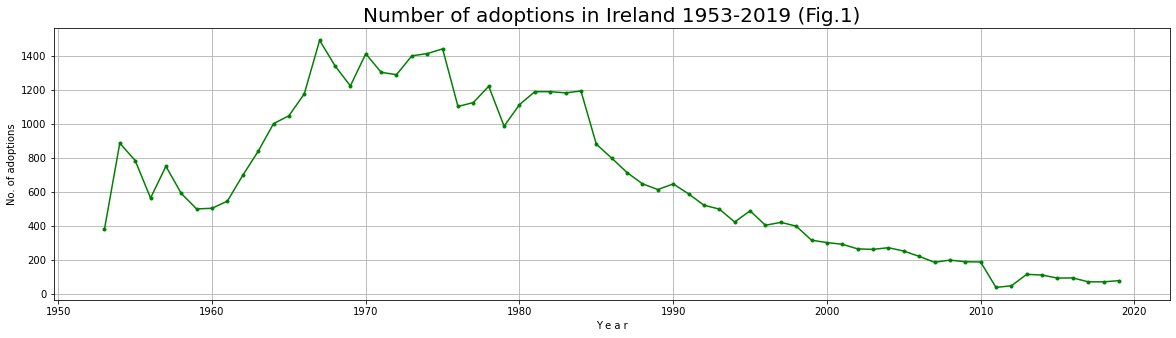

In [17]:
# Using Matplotlib to plot first visualisation to get a general idea of the child adoption trend in Ireland throughout the last 7 decades
x= ati['year']
y= ati['no_of_adoptions']

plt.rcParams['figure.figsize'] = (20,5)
plt.xlabel('Y e a r')
plt.ylabel('No. of adoptions')
plt.title('Number of adoptions in Ireland 1953-2019 (Fig.1)', fontsize=20)
plt.grid(True)
plt.plot(x, y, c='g', marker='o', markersize=3)

# Saving the plot as a png file for the Written Report
plt.savefig('Fig1.png')

plt.show()

In [18]:
ati.min()['no_of_adoptions']

39.0

In [19]:
ati.max()['no_of_adoptions']

1493.0

In [20]:
# Inspecting the last 20 rows of the DataFrame
ati.tail(20)

,year,total_births,nonmartial_births,%_of_total_births,no_of_adoptions
47,2000,54239,17235,31.78,303
48,2001,57882,18049,31.18,293
49,2002,60521,18815,31.09,266
50,2003,61517,19313,31.39,263
51,2004,61684,19935,32.32,273
52,2005,61042,19528,32.00,253
53,2006,64237,21295,33.15,222
54,2007,70620,23170,32.81,187
55,2008,75065,24844,33.09,200
56,2009,74728,24532,32.82,190


In [21]:
# Creating a new variable to extract the years 1999-2019
adop_1999_2019 = ati.loc[46:]
adop_1999_2019

,year,total_births,nonmartial_births,%_of_total_births,no_of_adoptions
46,1999,53354,16461,30.85,317
47,2000,54239,17235,31.78,303
48,2001,57882,18049,31.18,293
49,2002,60521,18815,31.09,266
50,2003,61517,19313,31.39,263
51,2004,61684,19935,32.32,273
52,2005,61042,19528,32.00,253
53,2006,64237,21295,33.15,222
54,2007,70620,23170,32.81,187
55,2008,75065,24844,33.09,200


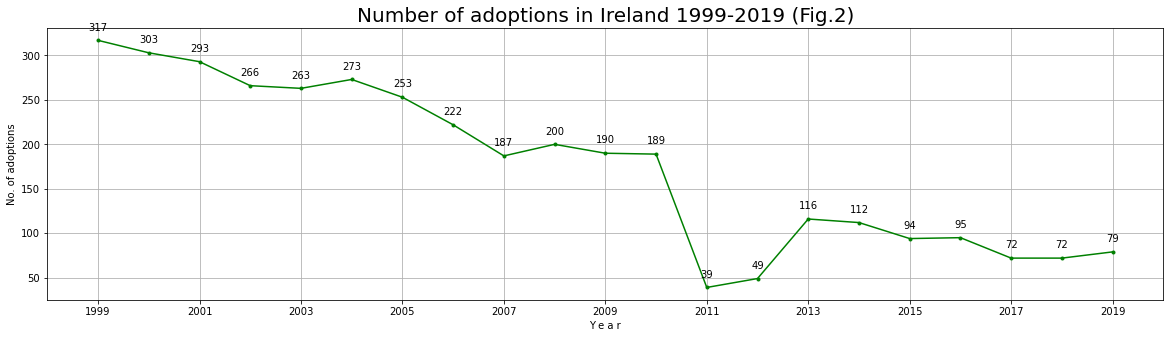

In [22]:
# Visualising the last 20 years of available data to get a better idea of what the adoption in Ireland looks like in present times
x_data= adop_1999_2019['year']
y_data= adop_1999_2019['no_of_adoptions']

plt.rcParams['figure.figsize'] = (20,5)
plt.xticks([1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019])
plt.xlabel('Y e a r')
plt.ylabel('No. of adoptions')
plt.title ('Number of adoptions in Ireland 1999-2019 (Fig.2)', fontsize=20)
plt.grid(True)
plt.plot(x_data,y_data, c='g', marker='o', markersize=3)

# Creating a FOR loop to assign value labels to markers and display them on the plot
for x,y in zip(x_data,y_data):
    label='{:}'.format(y)
    plt.annotate(label,
                (x,y),
                textcoords='offset points',
                xytext=(0,10),
                ha='center')
    
plt.savefig('Fig2.png')
plt.show()

## Dataset II - JSON

In [23]:
import json
with open('No. of Children in Foster Care General 2021.json') as json_file:
    json_data = json.load(json_file)
    
for key, value in json_data.items():
    print(key + ':', value)

objectIdFieldName: OBJECTID
uniqueIdField: {'name': 'OBJECTID', 'isSystemMaintained': True}
globalIdFieldName: 
fields: [{'name': 'OBJECTID', 'type': 'esriFieldTypeOID', 'alias': 'OBJECTID', 'sqlType': 'sqlTypeOther', 'domain': None, 'defaultValue': None}, {'name': 'OBJECTID_1', 'type': 'esriFieldTypeInteger', 'alias': 'OBJECTID', 'sqlType': 'sqlTypeOther', 'domain': None, 'defaultValue': None}, {'name': 'AreaID', 'type': 'esriFieldTypeInteger', 'alias': 'AreaID', 'sqlType': 'sqlTypeOther', 'domain': None, 'defaultValue': None}, {'name': 'RegionID', 'type': 'esriFieldTypeInteger', 'alias': 'RegionID', 'sqlType': 'sqlTypeOther', 'domain': None, 'defaultValue': None}, {'name': 'Area', 'type': 'esriFieldTypeString', 'alias': 'Area', 'sqlType': 'sqlTypeOther', 'length': 8000, 'domain': None, 'defaultValue': None}, {'name': 'Year', 'type': 'esriFieldTypeInteger', 'alias': 'Year', 'sqlType': 'sqlTypeOther', 'domain': None, 'defaultValue': None}, {'name': 'Jan', 'type': 'esriFieldTypeInteger'

In [24]:
# There was Data Type information that I didn't know how to normalize (or if they were even needed), so I just copied the 'features:' part of the file
# and created a list of dictionaries, so that I can convert them into a DataFrame
data = [{'attributes': {'OBJECTID': 1, 'OBJECTID_1': 1, 'AreaID': 1, 'RegionID': 20, 'Area': 'Carlow Kilkenny South Tipperary', 'Year': 2021, 'Jan': 220, 'Feb': 226, 'Mar': 225, 'Apr': 226, 'May': 230, 'Jun': 231, 'Jul': 227, 'Aug': 222, 'Sep': 220, 'Oct': 219, 'Nov': 222, 'Dec': None}}, {'attributes': {'OBJECTID': 2, 'OBJECTID_1': 2, 'AreaID': 2, 'RegionID': 19, 'Area': 'Cavan Monaghan', 'Year': 2021, 'Jan': 119, 'Feb': 122, 'Mar': 121, 'Apr': 121, 'May': 123, 'Jun': 123, 'Jul': 122, 'Aug': 122, 'Sep': 123, 'Oct': 117, 'Nov': 114, 'Dec': None}}, {'attributes': {'OBJECTID': 3, 'OBJECTID_1': 3, 'AreaID': 3, 'RegionID': 20, 'Area': 'Cork', 'Year': 2021, 'Jan': 498, 'Feb': 497, 'Mar': 495, 'Apr': 494, 'May': 493, 'Jun': 488, 'Jul': 486, 'Aug': 481, 'Sep': 485, 'Oct': 484, 'Nov': 484, 'Dec': None}}, {'attributes': {'OBJECTID': 4, 'OBJECTID_1': 4, 'AreaID': 4, 'RegionID': 21, 'Area': 'Donegal', 'Year': 2021, 'Jan': 165, 'Feb': 172, 'Mar': 173, 'Apr': 171, 'May': 174, 'Jun': 170, 'Jul': 169, 'Aug': 169, 'Sep': 173, 'Oct': 175, 'Nov': 178, 'Dec': None}}, {'attributes': {'OBJECTID': 5, 'OBJECTID_1': 5, 'AreaID': 5, 'RegionID': 19, 'Area': 'Dublin North', 'Year': 2021, 'Jan': 210, 'Feb': 210, 'Mar': 211, 'Apr': 215, 'May': 214, 'Jun': 214, 'Jul': 213, 'Aug': 213, 'Sep': 210, 'Oct': 213, 'Nov': 216, 'Dec': None}}, {'attributes': {'OBJECTID': 6, 'OBJECTID_1': 6, 'AreaID': 6, 'RegionID': 19, 'Area': 'Dublin City North', 'Year': 2021, 'Jan': 285, 'Feb': 285, 'Mar': 282, 'Apr': 285, 'May': 283, 'Jun': 288, 'Jul': 293, 'Aug': 291, 'Sep': 284, 'Oct': 289, 'Nov': 291, 'Dec': None}}, {'attributes': {'OBJECTID': 7, 'OBJECTID_1': 7, 'AreaID': 7, 'RegionID': 18, 'Area': 'Dublin South Central', 'Year': 2021, 'Jan': 220, 'Feb': 215, 'Mar': 221, 'Apr': 219, 'May': 215, 'Jun': 214, 'Jul': 218, 'Aug': 209, 'Sep': 212, 'Oct': 215, 'Nov': 211, 'Dec': None}}, {'attributes': {'OBJECTID': 8, 'OBJECTID_1': 8, 'AreaID': 8, 'RegionID': 18, 'Area': 'Dublin South East Wicklow', 'Year': 2021, 'Jan': 147, 'Feb': 142, 'Mar': 140, 'Apr': 138, 'May': 136, 'Jun': 132, 'Jul': 130, 'Aug': 134, 'Sep': 135, 'Oct': 136, 'Nov': 135, 'Dec': None}}, {'attributes': {'OBJECTID': 9, 'OBJECTID_1': 9, 'AreaID': 9, 'RegionID': 18, 'Area': 'Dublin South West Kildare West Wicklow', 'Year': 2021, 'Jan': 210, 'Feb': 214, 'Mar': 214, 'Apr': 213, 'May': 209, 'Jun': 210, 'Jul': 211, 'Aug': 214, 'Sep': 220, 'Oct': 221, 'Nov': 227, 'Dec': None}}, {'attributes': {'OBJECTID': 10, 'OBJECTID_1': 10, 'AreaID': 10, 'RegionID': 21, 'Area': 'Galway Roscommon', 'Year': 2021, 'Jan': 289, 'Feb': 292, 'Mar': 291, 'Apr': 293, 'May': 292, 'Jun': 287, 'Jul': 288, 'Aug': 283, 'Sep': 288, 'Oct': 285, 'Nov': 288, 'Dec': None}}, {'attributes': {'OBJECTID': 11, 'OBJECTID_1': 11, 'AreaID': 11, 'RegionID': 20, 'Area': 'Kerry', 'Year': 2021, 'Jan': 89, 'Feb': 88, 'Mar': 88, 'Apr': 91, 'May': 88, 'Jun': 87, 'Jul': 89, 'Aug': 89, 'Sep': 90, 'Oct': 94, 'Nov': 96, 'Dec': None}}, {'attributes': {'OBJECTID': 12, 'OBJECTID_1': 12, 'AreaID': 12, 'RegionID': 19, 'Area': 'Louth Meath', 'Year': 2021, 'Jan': 283, 'Feb': 275, 'Mar': 280, 'Apr': 291, 'May': 287, 'Jun': 287, 'Jul': 287, 'Aug': 285, 'Sep': 287, 'Oct': 286, 'Nov': 286, 'Dec': None}}, {'attributes': {'OBJECTID': 13, 'OBJECTID_1': 13, 'AreaID': 13, 'RegionID': 21, 'Area': 'Mayo', 'Year': 2021, 'Jan': 82, 'Feb': 83, 'Mar': 84, 'Apr': 83, 'May': 84, 'Jun': 81, 'Jul': 81, 'Aug': 80, 'Sep': 85, 'Oct': 90, 'Nov': 90, 'Dec': None}}, {'attributes': {'OBJECTID': 14, 'OBJECTID_1': 14, 'AreaID': 14, 'RegionID': 21, 'Area': 'The Midwest', 'Year': 2021, 'Jan': 397, 'Feb': 394, 'Mar': 391, 'Apr': 389, 'May': 388, 'Jun': 387, 'Jul': 387, 'Aug': 383, 'Sep': 377, 'Oct': 376, 'Nov': 369, 'Dec': None}}, {'attributes': {'OBJECTID': 15, 'OBJECTID_1': 15, 'AreaID': 15, 'RegionID': 18, 'Area': 'The Midlands', 'Year': 2021, 'Jan': 224, 'Feb': 224, 'Mar': 221, 'Apr': 228, 'May': 228, 'Jun': 224, 'Jul': 222, 'Aug': 219, 'Sep': 220, 'Oct': 218, 'Nov': 217, 'Dec': None}}, {'attributes': {'OBJECTID': 16, 'OBJECTID_1': 16, 'AreaID': 16, 'RegionID': 21, 'Area': 'Sligo Leitrim West Cavan', 'Year': 2021, 'Jan': 83, 'Feb': 81, 'Mar': 85, 'Apr': 82, 'May': 83, 'Jun': 82, 'Jul': 82, 'Aug': 84, 'Sep': 84, 'Oct': 85, 'Nov': 85, 'Dec': None}}, {'attributes': {'OBJECTID': 17, 'OBJECTID_1': 17, 'AreaID': 17, 'RegionID': 20, 'Area': 'Waterford Wexford', 'Year': 2021, 'Jan': 288, 'Feb': 285, 'Mar': 289, 'Apr': 289, 'May': 288, 'Jun': 286, 'Jul': 284, 'Aug': 279, 'Sep': 279, 'Oct': 274, 'Nov': 285, 'Dec': None}}, {'attributes': {'OBJECTID': 18, 'OBJECTID_1': 18, 'AreaID': 22, 'RegionID': 22, 'Area': 'Social Work Team for SCSA', 'Year': 2021, 'Jan': 6, 'Feb': 6, 'Mar': 6, 'Apr': 7, 'May': 7, 'Jun': 7, 'Jul': 8, 'Aug': 7, 'Sep': 10, 'Oct': 7, 'Nov': 8, 'Dec': None}}]

ch_fc_2021 = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')
ch_fc_2021


,attributes.OBJECTID,attributes.OBJECTID_1,attributes.AreaID,attributes.RegionID,attributes.Area,attributes.Year,attributes.Jan,attributes.Feb,attributes.Mar,attributes.Apr,attributes.May,attributes.Jun,attributes.Jul,attributes.Aug,attributes.Sep,attributes.Oct,attributes.Nov,attributes.Dec
0,1,1,1,20,Carlow Kilkenny South Tipperary,2021,220,226,225,226,230,231,227,222,220,219,222,None
1,2,2,2,19,Cavan Monaghan,2021,119,122,121,121,123,123,122,122,123,117,114,None
2,3,3,3,20,Cork,2021,498,497,495,494,493,488,486,481,485,484,484,None
3,4,4,4,21,Donegal,2021,165,172,173,171,174,170,169,169,173,175,178,None
4,5,5,5,19,Dublin North,2021,210,210,211,215,214,214,213,213,210,213,216,None
5,6,6,6,19,Dublin City North,2021,285,285,282,285,283,288,293,291,284,289,291,None
6,7,7,7,18,Dublin South Central,2021,220,215,221,219,215,214,218,209,212,215,211,None
7,8,8,8,18,Dublin South East Wicklow,2021,147,142,140,138,136,132,130,134,135,136,135,None
8,9,9,9,18,Dublin South West Kildare West Wicklow,2021,210,214,214,213,209,210,211,214,220,221,227,None
9,10,10,10,21,Galway Roscommon,2021,289,292,291,293,292,287,288,283,288,285,288,None


In [25]:
# Inspecting the DataFrame - all Data Types have been recognised correctly
ch_fc_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   attributes.OBJECTID    18 non-null     int64 
 1   attributes.OBJECTID_1  18 non-null     int64 
 2   attributes.AreaID      18 non-null     int64 
 3   attributes.RegionID    18 non-null     int64 
 4   attributes.Area        18 non-null     object
 5   attributes.Year        18 non-null     int64 
 6   attributes.Jan         18 non-null     int64 
 7   attributes.Feb         18 non-null     int64 
 8   attributes.Mar         18 non-null     int64 
 9   attributes.Apr         18 non-null     int64 
 10  attributes.May         18 non-null     int64 
 11  attributes.Jun         18 non-null     int64 
 12  attributes.Jul         18 non-null     int64 
 13  attributes.Aug         18 non-null     int64 
 14  attributes.Sep         18 non-null     int64 
 15  attributes.Oct         18

In [26]:
# Slicing the DataFrame, as only the data available at the end of the year 2021 are needed (reading Nov, as Dec is null) 
# I was trying to do ch_fc_2021.iloc[: , [-2]], but I kept getting an error message: "positional indexers are out-of-bounds"
# so I dropped the null column first (Dec)
ch_fc_2021.drop(columns='attributes.Dec', inplace=True)
ch_fc_2021 = ch_fc_2021.iloc[: , [-1]]
ch_fc_2021

,attributes.Nov
0,222
1,114
2,484
3,178
4,216
5,291
6,211
7,135
8,227
9,288


In [27]:
# Calculating the end-of-year total
total2021 = ch_fc_2021['attributes.Nov'].sum()
total2021

3802

In [28]:
# Importing the rest of the files as csv, because it is quicker ;-) but also because many of the files available in json had an error in source
ch_fc_2020 = pd.read_csv('no-of-children-in-foster-care-general-2020.csv')
ch_fc_2020

,RegionID,AreaID,Area,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,20,1,Carlow Kilkenny South Tipperary,2020,221,217,223,222,222,221,218,219,218,220,220,NaN
1,19,2,Cavan Monaghan,2020,127,127,126,128,126,130,126,126,125,123,119,NaN
2,20,3,Cork,2020,508,505,498,500,502,500,502,502,499,507,504,NaN
3,21,4,Donegal,2020,163,165,164,166,165,165,168,167,168,166,168,NaN
4,19,5,Dublin North,2020,202,200,200,203,209,211,209,212,209,211,211,NaN
5,19,6,Dublin City North,2020,293,289,289,297,294,295,289,282,279,274,275,NaN
6,18,7,Dublin South Central,2020,218,216,216,218,220,221,223,220,218,217,219,NaN
7,18,8,Dublin South East Wicklow,2020,157,157,158,154,154,151,150,147,145,144,144,NaN
8,18,9,Dublin South West Kildare West Wicklow,2020,213,213,213,213,213,213,214,214,213,215,213,NaN
9,21,10,Galway Roscommon,2020,277,274,281,287,289,284,289,293,289,288,289,NaN


In [29]:
total2020 = ch_fc_2020['Nov'].sum()
total2020

3833

In [30]:
ch_fc_2019 = pd.read_csv('no-of-children-in-foster-care-general-2019.csv')
ch_fc_2019

,RegionID,AreaID,Area,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,20,1,Carlow Kilkenny South Tipperary,2019,225,221,221,220,225,228,228,227,228,224,224,220
1,19,2,Cavan Monaghan,2019,132,133,136,136,136,135,131,129,127,126,127,128
2,20,3,Cork,2019,513,510,507,509,513,510,518,515,506,509,499,513
3,21,4,Donegal,2019,171,170,168,168,164,164,165,166,167,165,162,163
4,19,5,Dublin North,2019,194,198,198,194,198,203,209,209,205,207,207,207
5,19,6,Dublin City North,2019,307,307,298,297,299,298,292,291,289,285,295,290
6,18,7,Dublin South Central,2019,225,223,223,220,219,219,218,222,221,224,222,224
7,18,8,Dublin South East Wicklow,2019,176,175,173,171,167,166,161,155,155,157,158,160
8,18,9,Dublin South West Kildare West Wicklow,2019,203,205,207,205,207,206,203,204,206,213,212,210
9,21,10,Galway Roscommon,2019,309,308,306,298,302,304,311,303,291,291,286,286


In [31]:
total2019 = ch_fc_2019['Dec'].sum()
total2019

3936

In [32]:
ch_fc_2018 = pd.read_csv('no-of-children-in-foster-care-general-2018.csv')
ch_fc_2018

,RegionID,AreaID,Area,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,20,1,Carlow Kilkenny South Tipperary,2018,235,234,233,248,240,239,239,240,238,236,236,228
1,19,2,Cavan Monaghan,2018,131,130,128,129,129,127,130,131,132,132,129,131
2,20,3,Cork,2018,518,520,518,511,520,520,524,525,525,525,521,515
3,21,4,Donegal,2018,155,162,163,167,168,172,171,171,169,169,169,171
4,19,5,Dublin North,2018,207,203,206,204,207,201,199,193,191,194,197,196
5,19,6,Dublin City North,2018,325,325,322,318,316,315,310,308,307,309,310,306
6,18,7,Dublin South Central,2018,237,237,230,230,227,226,226,226,226,225,225,226
7,18,8,Dublin South East Wicklow,2018,181,180,179,177,179,180,178,177,179,177,176,177
8,18,9,Dublin South West Kildare West Wicklow,2018,227,218,215,214,216,219,218,213,208,207,202,197
9,21,10,Galway Roscommon,2018,317,318,323,320,320,320,318,317,316,315,312,309


In [33]:
total2018 = ch_fc_2018['Dec'].sum()
total2018

3967

In [34]:
ch_fc_2017 = pd.read_csv('no-of-children-in-foster-care-general-2017.csv')
ch_fc_2017

,RegionID,AreaID,Area,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,21,16,Sligo Leitrim West Cavan4,2017,77,76,76,77,77,80,73,73,75,80,81,79
1,18,9,Dublin South West Kildare West Wicklow3,2017,249,250,249,252,244,248,244,243,242,233,229,226
2,20,1,Carlow Kilkenny South Tipperary,2017,242,234,232,234,236,240,241,236,237,242,238,247
3,19,2,Cavan Monaghan,2017,123,122,128,126,125,129,127,129,125,127,127,128
4,20,3,Cork,2017,535,533,529,529,532,532,529,524,524,520,517,515
5,21,4,Donegal5,2017,173,173,171,170,165,167,163,161,159,154,155,158
6,19,5,Dublin North,2017,188,191,196,195,198,199,196,193,193,194,197,200
7,19,6,Dublin City North,2017,348,348,352,348,343,347,344,333,338,337,332,329
8,18,7,Dublin South Central,2017,240,247,255,256,244,234,231,233,234,237,234,233
9,18,8,Dublin South East Wicklow,2017,179,179,180,182,177,179,178,177,178,180,178,180


In [35]:
total2017 = ch_fc_2017['Dec'].sum()
total2017

4042

In [36]:
ch_fc_2016 = pd.read_csv('no-of-children-in-foster-care-general-2016.csv')
ch_fc_2016

,RegionID,AreaID,Area,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,21,16,Sligo Leitrim West Cavan,2016,82.0,82.0,82.0,82.0,76.0,76.0,78.0,79.0,79.0,77.0,78.0,78.0
1,18,9,Dublin South West Kildare West Wicklow,2016,270.0,270.0,269.0,269.0,268.0,269.0,270.0,257.0,248.0,250.0,257.0,250.0
2,20,1,Carlow Kilkenny South Tipperary,2016,238.0,245.0,244.0,244.0,249.0,246.0,249.0,247.0,245.0,243.0,238.0,239.0
3,19,2,Cavan Monaghan,2016,137.0,135.0,129.0,131.0,130.0,131.0,134.0,134.0,131.0,130.0,129.0,125.0
4,20,3,Cork,2016,550.0,550.0,560.0,543.0,542.0,539.0,529.0,540.0,533.0,541.0,527.0,527.0
5,21,4,Donegal,2016,161.0,162.0,163.0,159.0,168.0,166.0,167.0,167.0,169.0,169.0,169.0,174.0
6,19,5,Dublin North,2016,169.0,177.0,178.0,183.0,187.0,185.0,179.0,175.0,178.0,182.0,183.0,181.0
7,19,6,Dublin City North,2016,339.0,341.0,346.0,346.0,348.0,347.0,343.0,343.0,343.0,347.0,346.0,349.0
8,18,7,Dublin South Central,2016,245.0,242.0,246.0,249.0,249.0,250.0,246.0,245.0,242.0,240.0,240.0,242.0
9,18,8,Dublin South East Wicklow,2016,189.0,191.0,189.0,187.0,186.0,187.0,186.0,187.0,188.0,186.0,184.0,181.0


In [37]:
total2016 = ch_fc_2016['Dec'].sum()
total2016 = total2016.astype(int)
total2016

4111

In [38]:
ch_fc_2015 = pd.read_csv('no-of-children-in-foster-care-general-2015.csv')
ch_fc_2015

,RegionID,AreaID,Area,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,20,1,Carlow Kilkenny South Tipperary,2015,231.0,231.0,229.0,228.0,229.0,231.0,233.0,226.0,229.0,223.0,237.0,242.0
1,19,2,Cavan Monaghan,2015,141.0,141.0,143.0,136.0,134.0,135.0,138.0,141.0,142.0,138.0,138.0,137.0
2,20,3,Cork,2015,538.0,544.0,541.0,539.0,557.0,548.0,553.0,540.0,551.0,542.0,534.0,544.0
3,21,4,Donegal,2015,143.0,143.0,144.0,145.0,144.0,145.0,154.0,155.0,154.0,154.0,153.0,159.0
4,19,5,Dublin North,2015,159.0,170.0,168.0,171.0,174.0,173.0,176.0,175.0,173.0,170.0,167.0,170.0
5,19,6,Dublin City North,2015,340.0,333.0,338.0,335.0,336.0,334.0,337.0,337.0,335.0,339.0,341.0,338.0
6,18,7,Dublin South Central,2015,246.0,248.0,252.0,250.0,255.0,250.0,246.0,244.0,234.0,240.0,244.0,240.0
7,18,8,Dublin South East Wicklow,2015,184.0,187.0,193.0,193.0,192.0,192.0,189.0,186.0,188.0,189.0,191.0,189.0
8,18,9,Dublin South West Kildare West Wicklow,2015,275.0,278.0,274.0,276.0,278.0,278.0,274.0,273.0,274.0,274.0,272.0,272.0
9,21,10,Galway Roscommon,2015,359.0,361.0,372.0,388.0,345.0,348.0,351.0,348.0,348.0,311.0,307.0,307.0


In [39]:
total2015 = ch_fc_2015['Dec'].sum()
total2015 = total2015.astype(int)
total2015

4110

In [40]:
# Creating a dictionary of lists from the computed totals, converting it into a DataFrame
ch_fc_2015_2021_dict = {'year': [2015, 2016, 2017, 2018, 2019, 2020, 2021],
                   'total': [total2015, total2016, total2017, total2018, total2019, total2020, total2021]}
ch_fc_2015_2021 = pd.DataFrame(ch_fc_2015_2021_dict)
ch_fc_2015_2021

,year,total
0,2015,4110
1,2016,4111
2,2017,4042
3,2018,3967
4,2019,3936
5,2020,3833
6,2021,3802


In [41]:
# Slicing the DataFrame from Dataset I to merge with DataFrame from Dataset II
adop_2015_2019 = adop_1999_2019.loc[62:67, ('year', 'no_of_adoptions')]
adop_2015_2019

,year,no_of_adoptions
62,2015,94
63,2016,95
64,2017,72
65,2018,72
66,2019,79


In [42]:
# Merging both DataFrames on Right Join, as the right DataFrame has less rows (years), so they need to match
foster_vs_adop = ch_fc_2015_2021.merge(adop_2015_2019, on='year', how='right')

# Creating a new column to show the percentage
foster_vs_adop['%'] = foster_vs_adop['no_of_adoptions'] / foster_vs_adop['total'] *100
foster_vs_adop

,year,total,no_of_adoptions,%
0,2015,4110,94,2.287105
1,2016,4111,95,2.310873
2,2017,4042,72,1.781296
3,2018,3967,72,1.814974
4,2019,3936,79,2.007114


In [43]:
# Calculating the mean of the percentage
foster_vs_adop['%'].mean()

2.0402723260834152

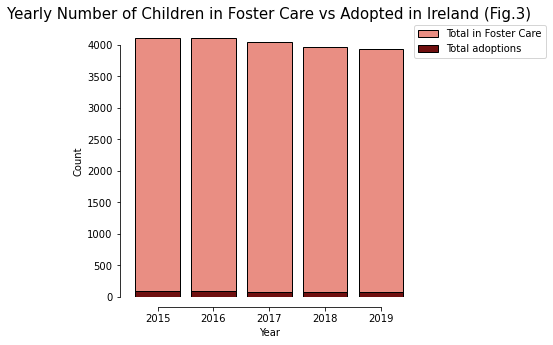

In [44]:
# Creating an overlay of two barplots

plt.rcParams['figure.figsize'] = (5,5)
fig, ax = plt.subplots(1,1)

sns.barplot(x='year', y='total', data=foster_vs_adop, label='Total in Foster Care', color='salmon', 
            linewidth=1, edgecolor='black')

sns.barplot(x='year', y='no_of_adoptions', data=foster_vs_adop, label='Total adoptions', color='maroon', 
            linewidth=1, edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title('Yearly Number of Children in Foster Care vs Adopted in Ireland (Fig.3)', fontsize=15, wrap=True)

 
sns.despine(offset=10, trim=True)

plt.savefig('Fig3.png', bbox_inches='tight')
plt.show()

## Dataset III - SQL

In [45]:
# Connecting with MySQL database, retirieving a table and converting it into a new DataFrame
conn=pymysql.connect(host='localhost', port=int(3306), user='root', passwd='passWORD_2022', db='project_certificate_2022')
celeb_adop=pd.read_sql_query("SELECT * FROM celebrity_adoption", conn)
celeb_adop

,id,name,year_of_adoption,childs_gender,childs_age_at_adoption,country_of_origin,parents_martial_status_at_adoption
0,1,Sia,2019,boy,18,domestic,single
1,2,Sia,2019,boy,18,domestic,single
2,3,Nicole Kidman & Tom Cruise,1992,girl,0,domestic,in relationship
3,4,Nicole Kidman & Tom Cruise,1995,boy,0,domestic,in relationship
4,5,Sandra Bullock,2010,boy,0,domestic,single
5,6,Sandra Bullock,2015,girl,3,domestic,single
6,7,Hugh Jackman,2000,boy,0,domestic,in relationship
7,8,Hugh Jackman,2005,girl,0,domestic,in relationship
8,9,Jillian Michaels,2012,girl,2,intercountry,in relationship
9,10,Madonna,2006,boy,1,intercountry,in relationship


In [46]:
celeb_adop.info() 
celeb_adop.duplicated()

# All the Datatypes were correctly set up in SQL, so no conversions needed
# No NULL values as such - where the age shows 0 it means the child was adopted right after birth
# Duplicates (Sia and Madonna) are there, because both have adopted two children of the same age in the same year.
# They don't show as Duplicates though because they have different id numbers in the created 'id' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  34 non-null     int64 
 1   name                                34 non-null     object
 2   year_of_adoption                    34 non-null     int64 
 3   childs_gender                       34 non-null     object
 4   childs_age_at_adoption              34 non-null     int64 
 5   country_of_origin                   34 non-null     object
 6   parents_martial_status_at_adoption  34 non-null     object
dtypes: int64(3), object(4)
memory usage: 2.0+ KB


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
dtype: bool

In [47]:
# Inspecting the data to make decisions on how to visualise them
celeb_adop['name'].nunique()

17

In [48]:
celeb_adop_type = celeb_adop.value_counts(subset='country_of_origin')
celeb_adop_type

country_of_origin
domestic        23
intercountry    11
dtype: int64

In [49]:
celeb_adop_mstat = celeb_adop.value_counts(subset='parents_martial_status_at_adoption')
celeb_adop_mstat

parents_martial_status_at_adoption
single             20
in relationship    14
dtype: int64

In [50]:
celeb_adop_gender = celeb_adop.value_counts(subset='childs_gender')
celeb_adop_gender

childs_gender
girl    18
boy     16
dtype: int64

In [51]:
# Using Numpy to get min, max, mean and median
age = celeb_adop['childs_age_at_adoption']
np_age = np.array(age)

age_min = np.min(np_age)
age_max = np.max(np_age)
age_mean = np.mean(np_age)
age_median = np.median(np_age)

print(age_min)
print(age_max)
print(age_mean)
print(age_median)

0
18
1.9705882352941178
0.0


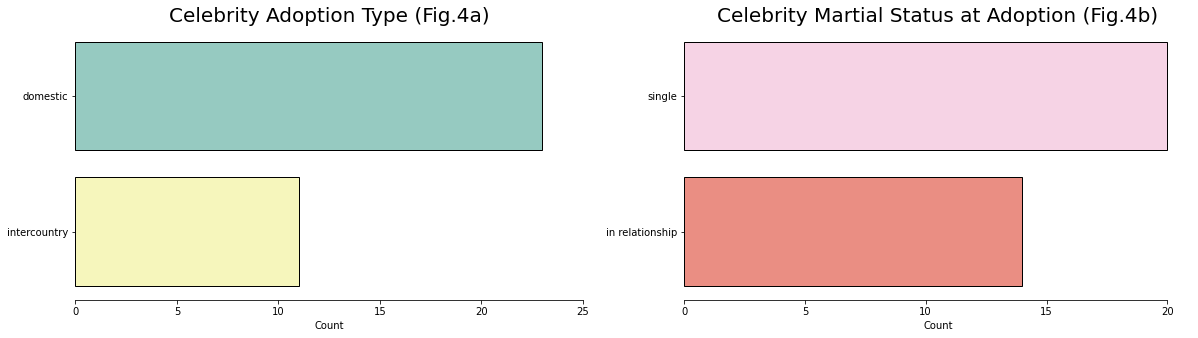

In [52]:
# Creating subplots
plt.rcParams['figure.figsize'] = (20,5)

ax = plt.subplot(1,2,1)
sns.countplot(y='country_of_origin', data=celeb_adop, palette='Set3', linewidth=1, edgecolor='black')
plt.title ('Celebrity Adoption Type (Fig.4a)', fontsize=20)
plt.xlabel('Count')
plt.xticks([0,5,10,15,20,25])
ax.set(ylabel=None)
sns.despine()

ax = plt.subplot(1,2,2)
sns.countplot(y='parents_martial_status_at_adoption', data=celeb_adop, palette='Set3_r', linewidth=1, edgecolor='black')
plt.title ('Celebrity Martial Status at Adoption (Fig.4b)', fontsize=20)
plt.xlabel('Count')
plt.xticks([0,5,10,15,20])
ax.set(ylabel=None)
sns.despine(left=True, trim=True)

plt.savefig('Fig4.png')
plt.show()

In [53]:
age_distrib = celeb_adop.value_counts(subset='childs_age_at_adoption').sort_index()
age_distrib


childs_age_at_adoption
0     19
1      5
2      2
3      2
4      4
18     2
dtype: int64

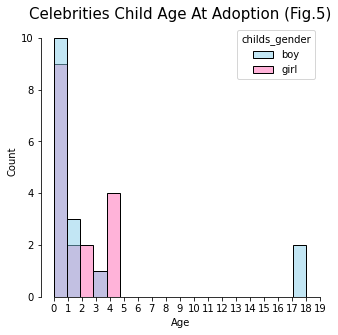

In [54]:
# Creating a histogram with custom colours
custom_col={'boy':'skyblue', 'girl':'hotpink'}

plt.rcParams['figure.figsize'] = (5,5)
ax = sns.histplot(x='childs_age_at_adoption', data=celeb_adop, bins=19, hue='childs_gender', palette=custom_col, linewidth=1, edgecolor='black')
ax.set_title('Celebrities Child Age At Adoption (Fig.5)', fontsize=15,  wrap=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
sns.despine(trim=True)

plt.savefig('Fig5.png')
plt.show()

In [55]:
# Pulling a second table from MySQL, which shows the amount of followers each celebrity has on Instagram (Nicole Kidman & Tom Cruise jointly)
celeb_popularity=pd.read_sql_query("SELECT * FROM celebrity_followers_ig2022", conn)
celeb_popularity

,name,amount_of_followers
0,Angelina Jolie,13100000
1,Cate Blanchett,467000
2,Charlize Theron,1300000
3,Diane Keaton,2100000
4,Hugh Jackman,30400000
5,Jamie Lee Curtis,4100000
6,Jillian Michaels,1400000
7,Katherine Heigl,4100000
8,Kristin Davis,1200000
9,Lionel Richie,1300000


In [56]:
# Adding a new column 'followers_in_mln' for easier reading, using Numpy to round to 1 decimal place
celeb_popularity['followers_in_mln'] = np.round(celeb_popularity['amount_of_followers'] / 10**6, decimals=1)
celeb_popularity.head(3)

,name,amount_of_followers,followers_in_mln
0,Angelina Jolie,13100000,13.1
1,Cate Blanchett,467000,0.5
2,Charlize Theron,1300000,1.3


In [57]:
# Counting how many children each celebrity has adopted
celeb_adop_unique = celeb_adop.value_counts('name')
celeb_adop_unique

name
Madonna                       4
Angelina Jolie                3
Sharon Stone                  3
Katherine Heigl               2
Sheryl Crow                   2
Sandra Bullock                2
Nicole Kidman & Tom Cruise    2
Kristin Davis                 2
Jamie Lee Curtis              2
Hugh Jackman                  2
Diane Keaton                  2
Charlize Theron               2
Sia                           2
Cate Blanchett                1
Lionel Richie                 1
Jillian Michaels              1
Meg Ryan                      1
dtype: int64

In [58]:
# Converting the result into a dictionary of lists and then into a DataFrame, because the value counts is a Series, not a column

celeb_adop_unique_dict = {'name': ['Madonna', 'Angelina Jolie', 'Sharon Stone', 'Katherine Heigl', 'Sheryl Crow',
                              'Sandra Bullock', 'Nicole Kidman & Tom Cruise', 'Kristin Davis', 'Jamie Lee Curtis', 
                              'Hugh Jackman', 'Diane Keaton', 'Charlize Theron', 'Sia', 'Cate Blanchett', 'Lionel Richie',
                              'Jillian Michaels', 'Meg Ryan'], 
                    'count': ['4','3','3','2','2','2','2','2','2','2','2','2','2','1','1','1','1']}
celeb_adop_unique = pd.DataFrame(celeb_adop_unique_dict)
celeb_adop_unique

,name,count
0,Madonna,4
1,Angelina Jolie,3
2,Sharon Stone,3
3,Katherine Heigl,2
4,Sheryl Crow,2
5,Sandra Bullock,2
6,Nicole Kidman & Tom Cruise,2
7,Kristin Davis,2
8,Jamie Lee Curtis,2
9,Hugh Jackman,2


In [59]:
# Merging both DataFrames on the Name key, doing Inner Join, because I want to see only the results, where data exist
# Sorting values from the highest to the lowest to see how popular the adopting celebrity is
celeb_adop_pop = celeb_popularity.merge(celeb_adop_unique, on='name').sort_values('amount_of_followers', ascending=False) 
celeb_adop_pop

,name,amount_of_followers,followers_in_mln,count
4,Hugh Jackman,30400000,30.4,2
10,Madonna,18000000,18.0,4
12,Nicole Kidman & Tom Cruise,14800000,14.8,2
0,Angelina Jolie,13100000,13.1,3
16,Sia,6900000,6.9,2
5,Jamie Lee Curtis,4100000,4.1,2
7,Katherine Heigl,4100000,4.1,2
14,Sharon Stone,3100000,3.1,3
3,Diane Keaton,2100000,2.1,2
6,Jillian Michaels,1400000,1.4,1


In [60]:
# Creating a Conditional Statement (custom function) and creating a new column out of it

followers = celeb_adop_pop['followers_in_mln']

def popularity(followers): 

    if(followers <1):
        return('low')
    
    elif(followers <10):
        return('medium')
    
    else:
        return('high')
    
celeb_adop_pop['popularity'] = followers.apply(popularity)

# Swapping the order of columns: count and popularity

c = celeb_adop_pop.columns
celeb_adop_pop[[c[3], c[4]]] = celeb_adop_pop[[c[4], c[3]]]
celeb_adop_pop = celeb_adop_pop.rename(columns={'count':'popularity', 'popularity':'count'})

celeb_adop_pop


,name,amount_of_followers,followers_in_mln,popularity,count
4,Hugh Jackman,30400000,30.4,high,2
10,Madonna,18000000,18.0,high,4
12,Nicole Kidman & Tom Cruise,14800000,14.8,high,2
0,Angelina Jolie,13100000,13.1,high,3
16,Sia,6900000,6.9,medium,2
5,Jamie Lee Curtis,4100000,4.1,medium,2
7,Katherine Heigl,4100000,4.1,medium,2
14,Sharon Stone,3100000,3.1,medium,3
3,Diane Keaton,2100000,2.1,medium,2
6,Jillian Michaels,1400000,1.4,medium,1


In [61]:
# Checking which years could potentially have a higher adoption rate, after a celebrity adoption
# I presume - with a year or two of delay for making the decision and for processing the application
celeb_adop.groupby(['year_of_adoption']).count()['name'].sort_values(ascending=False)

year_of_adoption
2006    3
2005    3
2015    3
2012    3
2017    2
2010    2
2009    2
2007    2
2019    2
2000    2
1996    2
1990    1
2002    1
2001    1
2011    1
1995    1
1992    1
2018    1
1986    1
Name: name, dtype: int64

In [62]:
# Sorting adoption by celebrities chronologically
celeb_adop_byyear = celeb_adop.sort_values('year_of_adoption')
celeb_adop_byyear

,id,name,year_of_adoption,childs_gender,childs_age_at_adoption,country_of_origin,parents_martial_status_at_adoption
28,30,Jamie Lee Curtis,1986,girl,0,domestic,in relationship
20,21,Lionel Richie,1990,girl,4,domestic,in relationship
2,3,Nicole Kidman & Tom Cruise,1992,girl,0,domestic,in relationship
3,4,Nicole Kidman & Tom Cruise,1995,boy,0,domestic,in relationship
31,33,Diane Keaton,1996,girl,1,domestic,single
29,31,Jamie Lee Curtis,1996,boy,0,domestic,in relationship
6,7,Hugh Jackman,2000,boy,0,domestic,in relationship
25,27,Sharon Stone,2000,boy,0,domestic,in relationship
32,34,Diane Keaton,2001,boy,1,domestic,single
15,16,Angelina Jolie,2002,boy,1,intercountry,in relationship


In [63]:
# Merging the two DataFrames to obtain the year of adoption and how popular the adopting celebrity is currently
# Note: The Instagram followers score is from 2022. I have no historical data of popularity, plus Instagram was launched only in 2010
combo = celeb_adop_pop.merge(celeb_adop_byyear, on='name')
combo

combo.to_csv('celeb_adop_combo.csv')

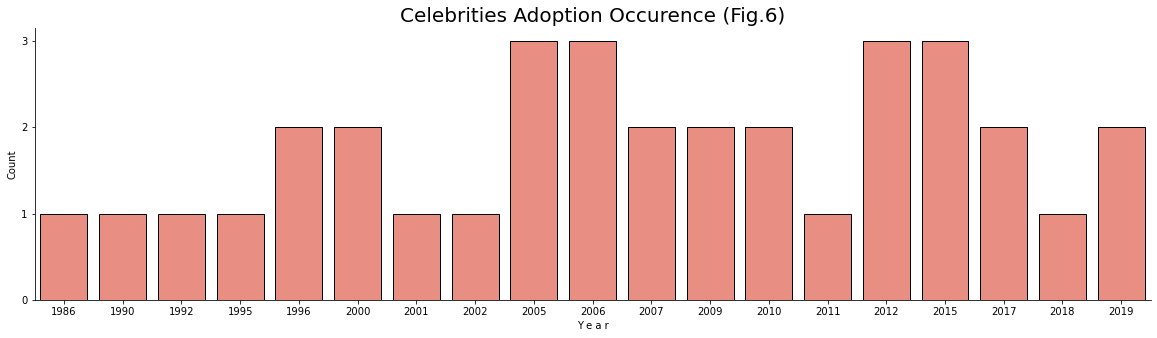

In [64]:
# Visualising the concept
plt.rcParams['figure.figsize'] = (20,5)
sns.countplot(x='year_of_adoption', data=celeb_adop, color='salmon', linewidth=1, edgecolor='black').set_title('Celebrities Adoption Occurence (Fig.6)', fontsize=20)
plt.xlabel('Y e a r')
plt.ylabel('Count')
plt.yticks([0,1,2,3])
sns.despine()

plt.savefig('Fig6.png')
plt.show()

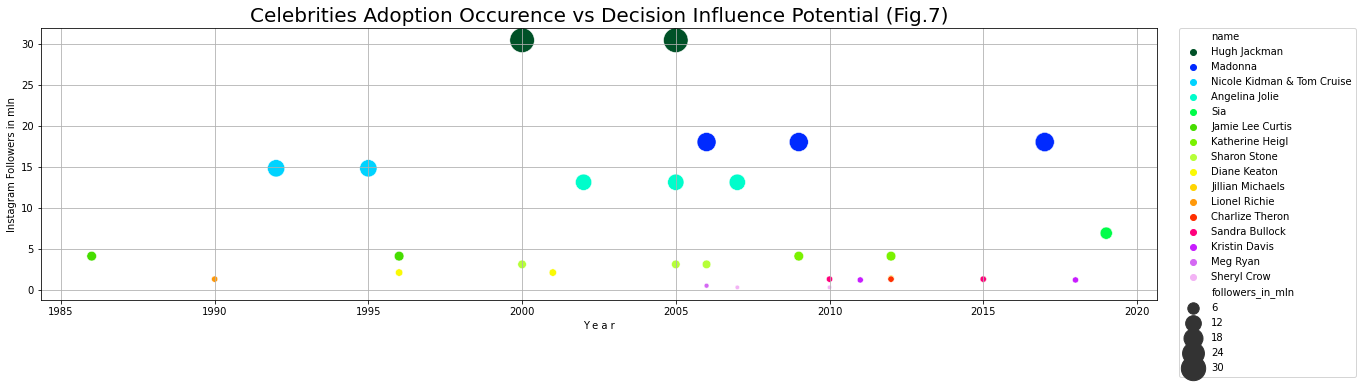

In [65]:
# Visualising the concept
x_data = combo['year_of_adoption']
y_data = combo['followers_in_mln']
size_custom = combo['followers_in_mln'] 

plt.rcParams['figure.figsize'] = (20,5)
sns.scatterplot(data=combo, x='year_of_adoption', y='followers_in_mln', size='followers_in_mln',  sizes=(20,600), hue='name', palette='gist_ncar')

plt.xlabel('Y e a r')
plt.ylabel('Instagram Followers in mln')
plt.title ('Celebrities Adoption Occurence vs Decision Influence Potential (Fig.7)', fontsize=20)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(True)

plt.savefig('Fig7.png', bbox_inches='tight')
plt.show()

## Dataset IV - Web Scraping

In [66]:
#Importing necessary packages
import requests
from bs4 import BeautifulSoup
import lxml

# Creating an URL object
url = 'https://www.johnstonsarchive.net/policy/adoptionstats.html'

# Creating an object page
page = requests.get(url)

# Changing html to Python-friendly format via lxml parser
# Obtaining page's information
soup = BeautifulSoup(page.text, 'lxml')
soup


<html>
<head>
<meta content="adoption, statistics, United States" name="keywords"/>
<title>Historical adoption statistics and child population/welfare statistics, United States</title></head>
<body>
<center>
<b><h3>Historical statistics on adoption in the United States, plus statistics on child population and welfare</h3></b>
<p>compiled by Wm. Robert Johnston
<br/>last updated 5 August 2017
</p></center><p>
<b>Introduction:</b>  Two tables are presented below.  The first summarizes adoption and foster care statistics for the United States from 1940 to the present.  The second provides an assortment of data related to United States child population, births, and child welfare.  Note that data are from multiple sources, sometimes using unconsistent methods or reporting periods (e.g. fiscal year vs. calendar year) such that time series may not be uniform.  Some reported figures are estimates, some are derived.  ART = assisted reproductive technology.  Sources are listed following the tabl

In [67]:
# Obtaining information from tag <table>
table_1 = soup.find('table')
print(table_1)

<table border="2" cellpadding="5">
<tr><th>year</th><th>total<br/>adoptions</th><th>adoptions per 1000 live births</th><th>adoptions, public</th><th>adoptions, int'l</th><th>adoptions, private domestic</th><th>adoptions, non-relatives</th><th>outgoing int'l adoptions</th><th>children in foster care</th><th>foster children per 1000 children</th><th>children entering foster care</th><th>children exiting foster care</th><th>children waiting for adoption</th><th>same, as % of foster children</th><th>children for whom parental rights were terminated</th></tr>
<tr><td>1940</td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td></tr>
<tr><td>1941</td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td></tr>
<tr><td>1942</td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> <

In [68]:
table_scraped = pd.read_html(str(table_1))[0]
table_scraped

,year,totaladoptions,adoptions per 1000 live births,"adoptions, public","adoptions, int'l","adoptions, private domestic","adoptions, non-relatives",outgoing int'l adoptions,children in foster care,foster children per 1000 children,children entering foster care,children exiting foster care,children waiting for adoption,"same, as % of foster children",children for whom parental rights were terminated
0,1940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1944,50000,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2013,NaN,NaN,50820,7094,NaN,NaN,84,401213,5.43,254712,238930,104387,26.0,58638
74,2014,116814,29.3,50625,6441,59748,75337,96,414429,5.62,264555,237554,108189,26.1,61070
75,2015,NaN,NaN,53549,5648,NaN,NaN,93,427910,5.81,269509,243060,111820,26.1,62378
76,2016,NaN,NaN,NaN,5372,NaN,NaN,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
table_sliced = table_scraped.iloc[20:78,[0,1]]
table_sliced.head(10)

,year,totaladoptions
20,1960,107000
21,1961,114000
22,1962,121000
23,1963,127000
24,1964,135000
25,1965,142000
26,1966,152000
27,1967,158000
28,1968,166000
29,1969,171000


In [70]:
# Creating a list of dictionaries - an alternative if the web scraping was unsuccessful
adoption_trends_usa_dict = [ {'year':2014, 'count':116814},
                             {'year':2013, 'count':np.nan},
                             {'year':2012, 'count':119514},
                             {'year':2011, 'count':121555},
                             {'year':2010, 'count':123671},
                             {'year':2009, 'count':131149},
                             {'year':2008, 'count':139647},
                             {'year':2007, 'count':153345},
                             {'year':2006, 'count':131503},
                             {'year':2005, 'count':146172},
                             {'year':2004, 'count':np.nan},
                             {'year':2003, 'count':np.nan},
                             {'year':2002, 'count':151736},
                             {'year':2001, 'count':140034},
                             {'year':2000, 'count':128073},
                             {'year':1999, 'count':np.nan},
                             {'year':1998, 'count':np.nan},
                             {'year':1997, 'count':np.nan},
                             {'year':1996, 'count':119779},
                             {'year':1995, 'count':np.nan},
                             {'year':1994, 'count':np.nan},
                             {'year':1993, 'count':np.nan},
                             {'year':1992, 'count':126951},
                             {'year':1991, 'count':118730},
                             {'year':1990, 'count':118138},
                             {'year':1989, 'count':121586},
                             {'year':1988, 'count':np.nan},
                             {'year':1987, 'count':118449},
                             {'year':1986, 'count':114033},
                             {'year':1985, 'count':np.nan},
                             {'year':1984, 'count':np.nan},
                             {'year':1983, 'count':np.nan},
                             {'year':1982, 'count':147610},
                             {'year':1981, 'count':np.nan},
                             {'year':1980, 'count':np.nan},
                             {'year':1979, 'count':np.nan},
                             {'year':1978, 'count':np.nan},
                             {'year':1977, 'count':np.nan},
                             {'year':1976, 'count':np.nan},
                             {'year':1975, 'count':129000},
                             {'year':1974, 'count':138000},
                             {'year':1973, 'count':148000},
                             {'year':1972, 'count':153000},
                             {'year':1971, 'count':169000},
                             {'year':1970, 'count':175000},
                             {'year':1969, 'count':171000},
                             {'year':1968, 'count':166000},
                             {'year':1967, 'count':158000},
                             {'year':1966, 'count':152000},
                             {'year':1965, 'count':142000},
                             {'year':1964, 'count':135000},
                             {'year':1963, 'count':127000},
                             {'year':1962, 'count':121000},
                             {'year':1961, 'count':114000},
                             {'year':1960, 'count':107000}]


adoption_trends_usa = pd.DataFrame(adoption_trends_usa_dict)
adoption_trends_usa.head(10)

,year,count
0,2014,116814.0
1,2013,NaN
2,2012,119514.0
3,2011,121555.0
4,2010,123671.0
5,2009,131149.0
6,2008,139647.0
7,2007,153345.0
8,2006,131503.0
9,2005,146172.0


In [71]:
adoption_trends_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    55 non-null     int64  
 1   count   36 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [72]:
# Merging DataFrame from Dataset I with the new DataFrame

atu = adoption_trends_usa
ati = ati[['year', 'no_of_adoptions']]

at_irl_usa = ati.merge(atu, on='year', how='left').dropna()
at_irl_usa.head()

,year,no_of_adoptions,count
7,1960,505,107000.0
8,1961,547,114000.0
9,1962,699,121000.0
10,1963,840,127000.0
11,1964,1003,135000.0


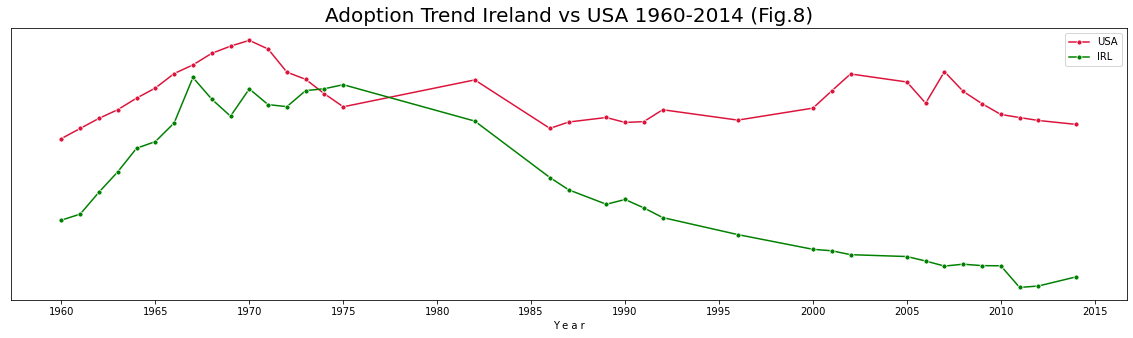

In [73]:
# Plot scatterplot IRL vs USA - to show how relatively to the USA, the adoption trend has significantly dropped in Ireland
irl = at_irl_usa['no_of_adoptions'] *100
usa = at_irl_usa['count']

plt.rcParams['figure.figsize'] = (20,5)
fig, ax = plt.subplots(1,1)
sns.lineplot(data=at_irl_usa, x='year', y=usa, marker='o', markersize=5, color='crimson')
sns.lineplot(data=at_irl_usa, x='year', y=irl, marker='o', markersize=5, color='green')
plt.xlabel('Y e a r')
plt.xticks([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])
ax.set(ylabel=None)
ax.axes.yaxis.set_visible(False)
plt.title('Adoption Trend Ireland vs USA 1960-2014 (Fig.8)', fontsize=20)
plt.legend(loc='upper right', labels=['USA', 'IRL'])

plt.savefig('Fig8.png', bbox_inches='tight')

plt.show()

In [74]:
# The end. Thank you for taking the time to read this!